# One Way Anova : One Factor With Post Hoc Test

# Problem Statement

We are here considering 4 water plan treatment given to potatos of 12 sample. and we got some weights.
We wants to know that whether we the different treatment plant has any effect on patatos or not
 
Say we have the following table:
 
<table>
    <tr>
        <th>Sr No</th>
        <th>Watering Plan 1</th>
        <th>Watering Plan 2</th>
        <th>Watering Plan 3</th>
        <th>Watering Plan 4</th>
    </tr>
    <tr>
        <td>1</td>
        <td>70</td>
        <td>76</td>
        <td>82</td>
        <td>90</td>
    </tr>
    <tr>
        <td>2</td>
        <td>62</td>
        <td>78</td>
        <td>88</td>
        <td>94</td>
    </tr>
    <tr>
        <td>3</td>
        <td>76</td>
        <td>68</td>
        <td>78</td>
        <td>92</td>
    </tr>
</table>

 
We have the weight of potato under each column. Let’s begin.
 
Under a one-way ANOVA we have a null hypothesis. The null hypothesis is that the mean of each column is nearly the same, i.e
 
mean(WP1) = mean(WP2) = mean(WP3) = mean(WP4)

where WPi = Watering plan i.
 
This, in turn, implies that the weight of potato doesn’t depend on the treatment by water. 
 
The alternate hypothesis Ha is that the means aren’t the same, and hence the watering plan does affect the weight of the potato.

Next, we need to decide the significance level. The standard is 0.01, 0.05 or 0.1 i.e 1%, 5% and 10% respectively. We will assume a significance level of 10% for our case.  The total variance is given by:

**SST (Sum Of Squares Total)  = SSB (Sum Of Squares Between) + SSW (Sum Of Squares Within)**
 

# Load Data

In [1]:
exp_design <- read.csv('design.csv')

In [2]:
exp_design

SampleNumber,Treatment,Weight
S1,2,76
S2,4,94
S3,1,70
S4,2,78
S5,3,82
S6,1,62
S7,3,88
S8,4,90
S9,2,68
S10,1,76


In [21]:
exp_design$Treatment <- as.factor(exp_design$Treatment)

# Run Anova

In [23]:
patato.aov <- aov(Weight ~ Treatment, data=exp_design)

# Anova Summary

In [8]:
summary(patato.aov)

            Df Sum Sq Mean Sq F value  Pr(>F)   
Treatment    3  899.7  299.89   11.25 0.00306 **
Residuals    8  213.3   26.67                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [24]:
qf(.90,3,8)

[1] 2.923796

# Conclusion

 Since 11.26 is greater than 2.92, it is highly unlikely for this to happen under the null hypothesis.
 
 Hence we reject the null hypothesis and conclude that water treatment has a significant effect on the weight of the potatoes.
 
 Note:Residuals under the ANOVA table in R refers to SSW i.e Sum of Squares Within.

# Post Hoc Tests

After ANOVA, we aren't sure what exact group is responsible for the rejection of the null hypotheses. For that, we use the Post Hoc tests. Post hoc tests are tests that are run to explore the differences between pairs of means and provide specific information on which means are significantly different from each other.

In this example, we need to identify the difference in means of weights between each watering plan. The post hoc test will help us identify the difference in means between pairs for e.g., 1-2, 2-3, 3-4, etc. This gives us an idea of identifying whether the difference is similar throughout or whether there is only one group that has a huge difference in means leading to the rejection of the null hypothesis.

The various post hoc tests are the LSD test (Least Significant Difference), Tukey's HSD test and Scheffe's test. In this case, the post hoc test we will be using is TukeyHSD. Let’s see how it works.


In [25]:
install.packages('TukeyC',repos = 'https://cran.r-project.org/')

Installing package into 'C:/Users/vikas/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'TukeyC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vikas\AppData\Local\Temp\RtmpgF9nT7\downloaded_packages


In [26]:
library(TukeyC)

In [31]:
TukeyHSD(patato.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Weight ~ Treatment, data = exp_design)

$Treatment
         diff        lwr      upr     p adj
2-1  4.666667 -8.8356349 18.16897 0.6956822
3-1 13.333333 -0.1689683 26.83563 0.0529020
4-1 22.666667  9.1643651 36.16897 0.0029508
3-2  8.666667 -4.8356349 22.16897 0.2456633
4-2 18.000000  4.4976984 31.50230 0.0116573
4-3  9.333333 -4.1689683 22.83563 0.1991048


## Conclusion

You need to only check the diff column for highest value
You can see that 4-1 (mean difference between waterlevels) has diff value of 22.666 that is higher so:
* 4-1:(22.66) you can say that Watering plan 4 will give you heavy weight patatos from watering plan 1
* 4-2:(18) you can say that Watering plan 4 will give you heavy weight patatos from watering plan 3

So plan 4 should be a promising option to look for, You can also look for adj p value



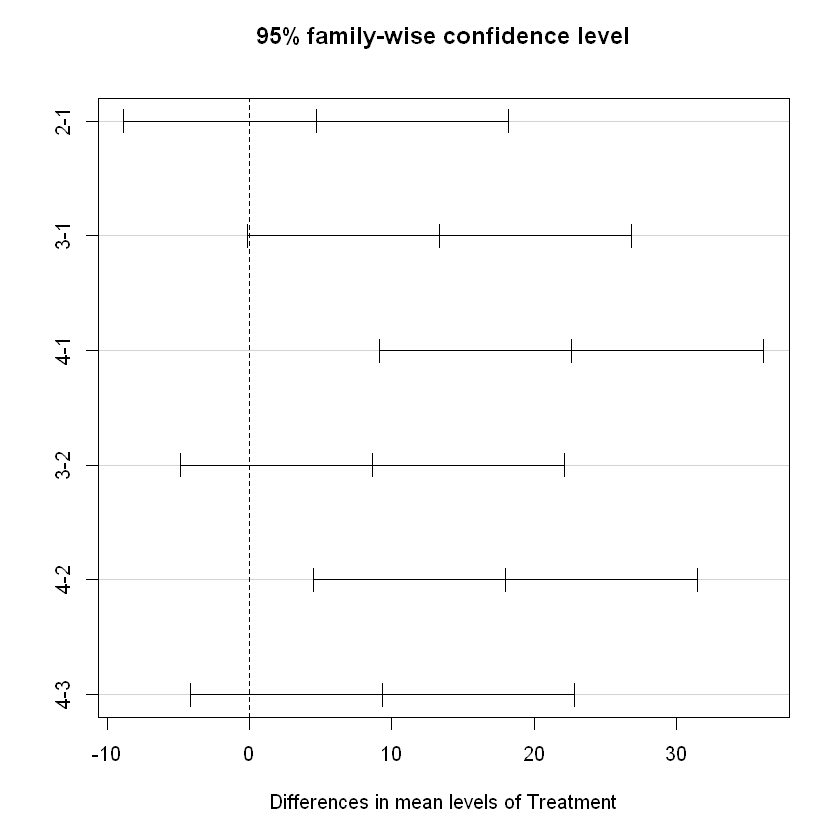

In [29]:
plot(TukeyHSD(patato.aov))